# INTRODUCTION

    Algebraic functions, functions that are constructed using only a finite amount of algebraic operations are really easy to understand, as algebraic operation involves only addition, subtraction, multiplication, division, and raising to a fractional power. However, when it comes to transcendental functions, functions that cannot be constructed by a finite amount of algebraic operations, they are much harder to comprehend. Some examples of a transcendental function are Trigonometric functions, Inverse Trigonometric functions, and hyperbolic functions.
    
    Fortunately, after the discovery of the CORDIC algorithm and Taylor’s Series, mathematicians and scientists are able to calculate and approximate these transcendental functions. This helped them obtain a better understanding of these functions, unlocking the unlimited potential of these functions.
    
    For this project, I was able to developed programs for the CORDIC Algorithm and Taylor Series in Python to compute trigonometric values and utilize data analysis by collecting the output data of algorithms to compare its time complexity and deviation from its true value. 

## COordinate Rotation DIgital Computer (CORDIC):

    The CORDIC Algorithm also known as the COordinate Rotation DIgital Computer or the Volder algorithm is an algorithm used to complete several computational tasks such as the calculation of trigonometric, logarithmic, hyperbolic functions, and complex multiplication and division.  It is one of the most efficient and simple algorithms as its implementation only involves addition, subtraction, bit-shifters, and table lookups.

### History:

    In the year of 1956, Jack E. Volder and the aeroelectronics department of Convair were given the task of replacing the analog computer-driven navigation system of the B-58 bomber, as that navigation system is time consuming and not very accurate. This task led to the discovery of the very first CORDIC prototype. The CORDIC digital resolver worked really well as a replacement with its high accuracy and performance.
    
    The aeroelectronics department’s very first idea towards inventing the CORDIC was trying to encode sine and cosine functions on optical encoders, but this idea was quickly abandoned. Volder then tried using trigonometry to try to tackle this problem, where he was inspired by two equations from his 1946 edition of the Handbook of Chemistry and Physics.
    
    Kn R sin(θ ± φ) = R sin(θ ) ± 2−n R cos(θ )
    Kn R cos(θ ± φ) = R cos(θ ) ∓ 2−n R sin(θ ) , where Kn = √1 + 2−2n.

    which inspired this equation for rotation :
   
    ⟨ rcos(θ+ϕ), rsin(θ+ϕ) ⟩ = ⟨ rcos(θ)cos(ϕ) − rsin(θ)sin(ϕ), rsin(θ)cos(ϕ) + rcos(θ)sin(ϕ) ⟩ =  
        
        [cosϕ −sinϕ][rcosθ]
        [sinϕ  cosϕ][rsinθ]
 
    Therefore, to rotate about the origin counterclockwise by an angle of ϕ, you would multiply the matrix equation above. Through the two equations, a new algorithm was constructed known as the COordinate Rotation DIgital Computer.

### Applications:

    The CORDIC’s main use as mentioned above is for the calculation of various types of transcendental functions and complex multiplication and division, but it is also able to do the calculation of square-roots, solution of linear system, QR Factorization and many other computational tasks. As a result, along with CORDIC’s high efficiency, it is applicable to a lot of different areas such as signal and image processing, communication systems, robotics and 3-D graphics apart from general scientific and technical computation.

## Taylor Series:

    Taylor’s series are representation of a function, expanding it into an infinite sum. Every subsequent term in this infinite series is calculated by using the derivatives of the previous term going to infinite.

    Hundreds of years ago, functions that are infinitely differentiable such as most transcendental functions were impossible to solve. Nevertheless, after the discovery of the Taylor’s series these transcendental functions could easily be represented by it. Taylor’s series has now become a vital theoretical tool in the computational science field and is used regularly by various mathematicians and scientists.




## SOFTWARE IMPLEMENTATION:

In [ ]:
import timeit
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Get the reference angle
def refangle(theta):
    while(theta >= 360 or theta < 0):
        if theta >= 360:
            theta = theta - 360
        elif theta < 0:
            theta = theta + 360
    return theta

#Getting the Factorial
def factorial(a):
    if a < 2:
        return 1
    return a * factorial(a-1)

### CORDIC Algorithm in Python:

In [49]:
#The angles rotated
#angles = atan(2.^-(0:27))

angles_old = ['0.78539816339745', '0.46364760900081', '0.24497866312686', '0.12435499454676', '0.06241880999596',
              '0.03123983343027', '0.01562372862048', '0.00781234106010', '0.00390623013197', '0.00195312251648', 
              '0.00097656218956', '0.00048828121119', '0.00024414062015', '0.00012207031189', '0.00006103515617'
             ]

#Turning the angle from string to float
angles = [float(i) for i in angles_old]

#Asking user for angle
ref = input("Angle in Degrees = ")
ref = refangle(int(ref))

#Getting the Quadrant
if ref <= 90 and ref >= 0:
    ref = refangle(int(ref))
    Quad = 1
elif ref <= 180 and ref > 90:
    ref = 180 - refangle(int(ref))
    Quad = 2
elif ref <= 270 and ref > 180:
    ref = refangle(int(ref)) - 180
    Quad = 3
elif ref <= 360 and ref > 270:
    Quad = 4
    ref = 360 - refangle(int(ref))

Vxnew = 1
Vynew = 0
#constant after 28 iteration
K =  0.60725293500888
theta = 0

start = timeit.default_timer()
#iterations
for n in range(len(angles)):
    #Counter-clockwise rotation since Reference Angle less than theta
    if int(ref) > theta:
        #Matrix Rotation Formula for CC
        Vx = Vxnew - ((1 / 2 ** n) * Vynew)
        Vy = ((1 / 2 ** n) * Vxnew) + Vynew
        Vxnew = Vx
        Vynew = Vy
        #New theta after rotation
        theta = theta + (math.degrees(angles[n]))
    #Clockwise rotation since Reference Angle more than theta
    else:
        #Matrix Rotation Formula for C
        Vx = Vxnew + ((1 / 2 ** n) * Vynew)
        Vy = (-(1 / 2 ** n) * Vxnew) + Vynew
        Vxnew = Vx
        Vynew = Vy
        #New theta after Rotation
        theta = theta - (math.degrees(angles[n]))
stop = timeit.default_timer()

#Adjust Vector Length
cosx = Vxnew * K
sinx = Vynew * K


#Determining whether to make the trig function negative depending on quadrant
if int(Quad) == 1:
    cosx = cosx
    sinx = sinx
elif int(Quad) == 2:
    cosx = cosx * -1
elif int(Quad) == 3:
    cosx = cosx * -1
    sinx = sinx * -1
elif int(Quad) == 4:
    sinx = sinx * -1

#Getting the error for Sine and Cosine
coserror = abs(cosx - np.cos(np.deg2rad(ref)))
sinerror = abs(sinx - np.sin(np.deg2rad(ref)))

print("cos(x): " + str(cosx))
print("sin(x): " + str(sinx))
print("cos(x) Error: " + str(coserror))
print("sin(x) Error: " + str(sinerror))
print("time: " + str(stop - start))

Angle in Degrees = 35
cos(x): 0.8191245309848876
sin(x): 0.5736157263334231
cos(x) Error: 2.7513304104220815e-05
sin(x) Error: 3.928998237701098e-05
time: 0.00019502800569171086


### Taylor Series Algorithm in Python:

In [50]:
#Asking a user for an Angle
angle = input("Angle in Degrees = ")
#Getting the reference angle of the input user angle
angle = refangle(int(angle))
#Changing angle into radian mode
angle = float(angle) * (math.pi/180)
#Asking a user for Order of derivative
order = input("Order = ")
n = 0
cosx = 0
sinx = 0

start = timeit.default_timer()
for n in range(int(order)):
#Formula for Taylor expansion of Cosine
    ocosx = ((-1)**n)*(float(angle)**(2*n)) / factorial(2*n)
#Adding the order of derivative all together
    cosx = cosx + ocosx

#Formula for Taylor Expansion of Sine    
    osinx = ((-1)**n)*(float(angle)**(2*n+1)) / factorial(2*n+1)
#Adding the order of derivative all togehter
    sinx = sinx + osinx

stop = timeit.default_timer()

#Getting the error for Sine and Cosine
coserror = abs(cosx - math.cos(angle))
sinerror = abs(sinx - math.sin(angle))
 
print("cos(x): " + str(cosx))
print("sin(x): " + str(sinx))
print("cos(x) Error: " + str(coserror))
print("sin(x) Error: " + str(sinerror))
print("time: " + str(stop - start))

Angle in Degrees = 35
Order = 15
cos(x): 0.8191520442889918
sin(x): 0.573576436351046
cos(x) Error: 0.0
sin(x) Error: 0.0
time: 0.00036815800558542833


## Conclusion on Accuracy:

    The Taylor Series evaluation of cosx and sinx, such that x = 35 degrees has an error of 0.0, while the CORDIC Algorithm has an error of the degree 10^-5. Therefore, we can conclude that the Taylor Series Algorithm has a better accuracy.

## Data Collection:

### CORDIC Algorithm Time Data:

In [39]:
cordicData = []
#The angles rotated
#angles = atan(2.^-(0:27))
#15 rotations
angles_old = ['0.78539816339745', '0.46364760900081', '0.24497866312686', '0.12435499454676', '0.06241880999596',
              '0.03123983343027', '0.01562372862048', '0.00781234106010', '0.00390623013197', '0.00195312251648', 
              '0.00097656218956', '0.00048828121119', '0.00024414062015', '0.00012207031189', '0.00006103515617'
             ]

#Turning the angle from string to float
angles = [float(i) for i in angles_old]

for x in range(5):
    if x == 0:
        numLoops = 10
    elif x == 1:
        numLoops = 100
    elif x == 2:
        numLoops = 1000
    elif x == 3:
        numLoops = 10000
    elif x == 4:
        numLoops = 100000
        
    start = timeit.default_timer()
    for ref in range(numLoops):

        ref = refangle(int(ref))

        if ref <= 90 and ref >= 0:
            ref = refangle(int(ref))
        elif ref <= 180 and ref > 90:
            ref = 180 - refangle(int(ref))
        elif ref <= 270 and ref > 180:
            ref = refangle(int(ref)) - 180
        elif ref <= 360 and ref > 270:
            ref = 360 - refangle(int(ref))

        Vxnew = 1
        Vynew = 0
        #constant after 28 iteration
        K =  0.60725293500888
        theta = 0

        #iterations
        for n in range(len(angles)):
            #Counter-clockwise rotation since Reference Angle less than theta
            if int(ref) > theta:
                #Matrix Rotation Formula for CC
                Vx = Vxnew - ((1 / 2 ** n) * Vynew)
                Vy = ((1 / 2 ** n) * Vxnew) + Vynew
                Vxnew = Vx
                Vynew = Vy
                #New theta after rotation
                theta = theta + (math.degrees(angles[n]))
            #Clockwise rotation since Reference Angle more than theta
            else:
                #Matrix Rotation Formula for C
                Vx = Vxnew + ((1 / 2 ** n) * Vynew)
                Vy = (-(1 / 2 ** n) * Vxnew) + Vynew
                Vxnew = Vx
                Vynew = Vy
                #New theta after Rotation
                theta = theta - (math.degrees(angles[n]))
    stop = timeit.default_timer()
    cordicData.append(stop - start) 
    print("time for " + str(numLoops) + " iterations: " + str(stop - start))
print(cordicData)

time for 10 iterations: 0.00019561099907150492
time for 100 iterations: 0.0018564929996500723
time for 1000 iterations: 0.02088963400456123
time for 10000 iterations: 0.17171796099864878
time for 100000 iterations: 2.5780259309976827
[0.00019561099907150492, 0.0018564929996500723, 0.02088963400456123, 0.17171796099864878, 2.5780259309976827]


### Taylor Series Algorithm Time Data

In [40]:
taylorData = []
order = 15
n = 0
cosx = 0
sinx = 0

for x in range(5):
    if x == 0:
        numLoops = 10
    elif x == 1:
        numLoops = 100
    elif x == 2:
        numLoops = 1000
    elif x == 3:
        numLoops = 10000
    elif x == 4:
        numLoops = 100000
   
    start = timeit.default_timer()
    for angle in range(numLoops):

        angle = refangle(int(angle))
        angle = float(angle) * (math.pi/180)

        for n in range(int(order)):
        #Formula for Taylor expansion of Cosine
            ocosx = ((-1)**n)*(float(angle)**(2*n)) / factorial(2*n)
        #Adding the order of derivative all together
            cosx = cosx + ocosx

        #Formula for Taylor Expansion of Sine    
            osinx = ((-1)**n)*(float(angle)**(2*n+1)) / factorial(2*n+1)
        #Adding the order of derivative all togehter
            sinx = sinx + osinx

    stop = timeit.default_timer()
    taylorData.append(stop - start)
    print("time for " + str(numLoops) + " iterations: " + str(stop - start))
print(taylorData)

time for 10 iterations: 0.000920421996852383
time for 100 iterations: 0.009438872002647258
time for 1000 iterations: 0.08341941300022881
time for 10000 iterations: 0.7822316860037972
time for 100000 iterations: 8.366445086998283
[0.000920421996852383, 0.009438872002647258, 0.08341941300022881, 0.7822316860037972, 8.366445086998283]


## Data Visualization:

CORDIC Algoritm: Blue
Taylor Series: Red


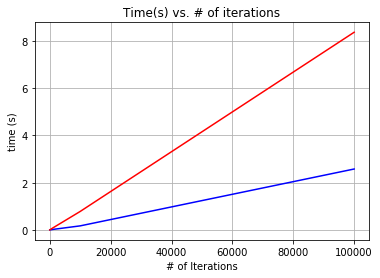

In [48]:
iterations = [10, 100, 1000, 10000, 100000]
c = cordicData
t = taylorData

fig, ax = plt.subplots()
ax.plot(iterations, c, 'b')
ax.plot(iterations, t, 'r')

ax.set(xlabel='# of Iterations', ylabel='time (s)',
       title = 'Time(s) vs. # of iterations')
ax.grid()

print("CORDIC Algoritm: Blue")
print("Taylor Series: Red")

fig.savefig("test.png")
plt.show()

## Conclusion on time complexity
    
    Through analyzing the graph, we can see that the Taylor Series Algorithm (red) requiring a much longer time to run numbers of iterations compared to the CORDIC Algorithm (Blue). We can also see the Taylor Series Algorithm (Red) growing at a much faster rate compared to the CORDIC Algorithm (Blue). Therefore, we can conclude that the CORDIC Algorithm has a better time complexity.